In [1]:
import os
from ete3 import Tree

#max_rf = 34

def rf_distance(t1, t2):
    rf, max_rf, common_leaves, parts_t1, parts_t2,discard_t1, discart_t2 = t1.robinson_foulds(t2, unrooted_trees = True)
    return rf

def calculate_dm():
    distance_matrix = [[0.0 for _ in range(1000)] for __ in range(1000)]
    trees = [None for _ in range(1000)]
    d = "output/"
    with os.scandir(d) as it:
        for entry in it:
            if not entry.is_file() or not entry.name.endswith("bestTree"):
                continue
            digits = entry.name.split('.')[0]
            idx = int(digits) -1
            trees[idx] = Tree(os.path.join(d, entry.name))
    for (i, tree) in enumerate(trees):
        if not tree:
            print(i)
    
    for i in range(1000):
        for j in range(i, 1000):
            rfd = rf_distance(trees[i], trees[j])
            distance_matrix[i][j] = rfd
            distance_matrix[j][i] = rfd
            
    with open("temp/distance.matrix", "w+") as dm_file:
        for row in distance_matrix:
            dm_file.write(",".join([str(el) for el in row]) + "\n")
            
    return distance_matrix

#dm = calculate_dm()
                
                
                

In [2]:
def read_dm():
    dm = []
    for row in open("temp/distance.matrix", "r").read().split("\n")[:-1]:
        dm.append([int(val) for val in row.split(',')])
    return dm

def to_relative(dm):
    max_rf = 34
    rel_dm = []
    for row in dm:
        rel_dm.append([val/34 for val in row])
    return rel_dm

In [3]:
dm = read_dm()
dm = to_relative(dm)

In [4]:
upper_triangle = [dm[i][j] for i in range(1000) for j in range(i+1, 1000)]
avgs = [sum(dm[i]) / 999 for i in range(1000)]
avg = sum(upper_triangle) / len(upper_triangle)
print(avg)

0.07822858152323985


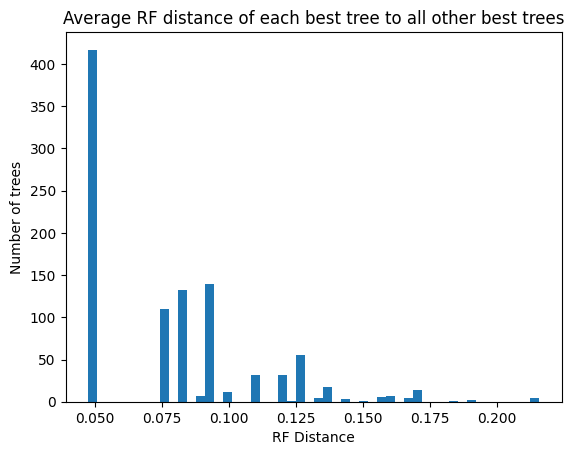

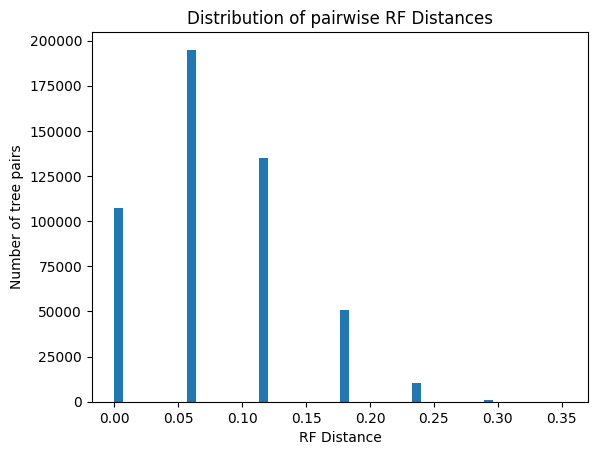

In [5]:
import matplotlib.pyplot as plt

plt.title("Average RF distance of each best tree to all other best trees")
plt.xlabel("RF Distance")
plt.ylabel("Number of trees")
plt.hist(avgs, bins=50)
plt.show()

plt.title("Distribution of pairwise RF Distances")
plt.xlabel("RF Distance")
plt.ylabel("Number of tree pairs")
plt.hist(upper_triangle, bins=50)
plt.show()